<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E4%BA%94%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

确定葡萄酒质量时一般是通过聘请一批有资质的评酒员进行品评。每个评酒员在对葡萄酒进行品尝后对其分类指标打分，然后求和得到其总分，从而确定葡萄酒的质量。酿酒葡萄的好坏与所酿葡萄酒的质量有直接的关系，葡萄酒和酿酒葡萄检测的理化指标会在一定程度上反映葡萄酒和葡萄的质量。附件1给出了某一年份一些葡萄酒的评价结果，附件2和附件3分别给出了该年份这些葡萄酒的和酿酒葡萄的成分数据。请尝试建立数学模型讨论下列问题：
1. 分析附件1中两组评酒员的评价结果有无显著性差异，哪一组结果更可信？
2. 根据酿酒葡萄的理化指标和葡萄酒的质量对这些酿酒葡萄进行分级。
3. 分析酿酒葡萄与葡萄酒的理化指标之间的联系。
4. 分析酿酒葡萄和葡萄酒的理化指标对葡萄酒质量的影响，并论证能否用葡萄和葡萄酒的理化指标来评价葡萄酒的质量？

葡萄酒的主要质量指标大体可分为感官指标和理化指标两大类。品酒员的评分就是根据感官指标得出的，而理化指标则由具体的化学成分来定。

## 第一问

需要先对数据进行处理，以及正态性检验(Q-Q, K-S)，然后再用t检验，得到每一个特征指标的显著性值，再去分析。

首先是红葡萄酒的分析，这题目给的评分数据很乱，两组评分进行整合后的数据分别为data和data2，前十列就是表里的数据，最后一列是每行的平均值，其实就是对应了相应特征的平均打分，这个就是第一问需要的数据。

In [2]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/2012A")
!ls

 data2.csv   data4.csv	'SimHei .ttf'		      附件2-指标总表.xls
 data3.csv   data.csv	 附件1-葡萄酒品尝评分表.xls   附件3-芳香物质.xls


In [4]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-08-29 07:22:40--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  28.4MB/s    in 0.3s    

2022-08-29 07:22:40 (28.4 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/2012A/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 25.0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

这里记录一下踩的坑，xls文件最好不用，尽量用xlsx和csv，最好是csv文件，用记事本打开就知道了，xls文件是有格式和解码的，而csv就没有太多格式。

In [6]:
data1 = pd.read_csv("data.csv", header = None)
data1 = data1.astype(float)

In [ ]:
average_socre1 = (data1.values[:,10]).reshape(27,10)
average_socre1

In [ ]:
cate = np.arange(1,28).reshape(-1,1)
pre_data1 = np.concatenate((average_socre1, cate) , axis = 1)
pre_data1

然后对第二组也进行相同的操作，最终得到处理好的dataframe：

In [9]:
data2 = pd.read_csv("data2.csv", header = None)
average_socre2 = (data2.values[:,10]).reshape(27,10)
pre_data2 = np.concatenate((average_socre2, cate) , axis = 1)
pre_data = np.concatenate((pre_data1, pre_data2) , axis = 0)
df_red = pd.DataFrame(data=pre_data,
             columns = ['外观澄清度','外观色调','香气纯正度','香气浓度','香气质量','口感纯正度','口感浓度','口感持久性','口感质量','整体评价','样品号'])
df_red['组别'] = np.array([1]*27+[2]*27).reshape(-1,1)
df_red

,外观澄清度,外观色调,香气纯正度,香气浓度,香气质量,口感纯正度,口感浓度,口感持久性,口感质量,整体评价,样品号,组别
0,2.300000,6.400000,4.3,5.4,12.2,2.9,4.5,5.2,11.8,7.7,1.0,1
1,2.900000,7.200000,4.5,6.5,13.0,4.7,6.8,6.7,18.4,9.6,2.0,1
2,3.400000,8.600000,4.7,6.2,13.2,4.7,6.2,6.7,17.3,9.4,3.0,1
3,4.000000,8.000000,3.4,4.7,11.2,3.4,5.4,5.6,14.5,8.4,4.0,1
4,4.300000,8.400000,4.5,5.9,12.6,4.0,4.9,5.3,14.8,8.6,5.0,1
5,3.900000,7.000000,4.5,6.0,12.2,3.6,5.3,6.0,15.1,8.6,6.0,1
6,4.000000,5.800000,4.2,5.7,11.6,4.3,5.5,6.1,15.4,8.9,7.0,1
7,2.700000,7.000000,4.7,6.4,13.6,3.7,5.8,5.8,14.2,8.4,8.0,1
8,3.100000,7.400000,5.5,7.3,14.4,4.7,6.4,6.4,16.6,9.7,9.0,1
9,4.000000,6.800000,4.7,6.2,12.6,4.1,5.7,5.9,15.4,8.8,10.0,1


接下来要看一下数据分布，以及正态检验：

In [10]:
columns = ['外观澄清度','外观色调','香气纯正度','香气浓度','香气质量','口感纯正度','口感浓度','口感持久性','口感质量','整体评价']

In [11]:
grouped = df_red.groupby('组别')
df1 = grouped.get_group(1)
df2 = grouped.get_group(2)

In [ ]:
# 1组
for column in columns:
  sns.histplot(df1[column] ,bins=10,kde=True)
  plt.show()

In [ ]:
# 2组
for column in columns:
  sns.histplot(df2[column] ,bins=8,kde=True)
  plt.show()

In [ ]:
# 整体
for column in columns:
  sns.histplot(df_red[column] ,bins=10,kde=True)
  plt.show()

看起来是挺合理的，接下来进行正态性检验：

In [ ]:
from scipy.stats import kstest
import statsmodels.api as sm

# 组别1
for i, column in enumerate(columns) :
  # 这里用np.array的类型会出错，因为是object对象而不是数值类型
  data_tem = df1[column].values.tolist()
  test_stat = kstest(data_tem,'norm')
  ppqqplot=sm.ProbPlot(df1[column]) # take in dataframe
  ppqqplot.qqplot(line="q")
  plt.show()
  print(test_stat[1])


In [ ]:
# 组别2
for i, column in enumerate(columns) :
  # 这里用np.array的类型会出错，因为是object对象而不是数值类型
  data_tem = df2[column].values.tolist()
  test_stat = kstest(data_tem,'norm')
  ppqqplot=sm.ProbPlot(df2[column]) # take in dataframe
  ppqqplot.qqplot(line="q")
  plt.show()
  print(test_stat[1])


可以看到都通过了正态性检验，接下来直接用T检验就行了：

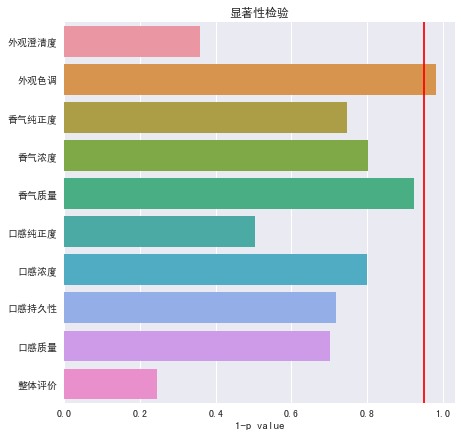

In [17]:
from scipy.stats import ttest_ind
p = [] 
pp = [] 
for i in columns:    
    t, pvalue = ttest_ind(df1[i], df2[i])
    p.append(1 - pvalue)
    pp.append(pvalue)
plt.figure(figsize=(7, 7))
sns.barplot(x=p, y=columns)
plt.title('显著性检验')
plt.axvline(x=(1 - 0.05), color='r')
plt.xlabel('1-p value')
plt.show()

可以看出香气质量和外观色调是具有显著性差异的，其他的指标可以认为无显著性差异。白葡萄酒同理处理即可。

对于数据的可信度，可以转换为对打分的方差以及稳定性的分析，初步的想法是对于每个指标求方差，然后根据权重加权后求平均，先来粗略看一下综合得分的方差：

In [18]:
eva_index = np.arange(10,280,10)
eva_index = eva_index-1

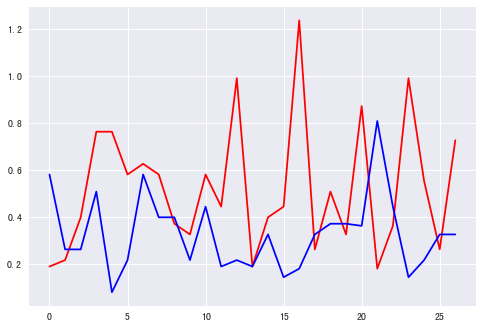

In [19]:
# 第一组：
data1_eva = data1.values[eva_index,:]
var1= np.var(data1_eva, axis = 1)

# 第二组
data2_eva = data2.values[eva_index,:]
var2= np.var(data2_eva, axis = 1)

x_axis = np.arange(0,27)
plt.plot(x_axis, var1, color = 'red')
plt.plot(x_axis, var2, color = 'blue')
plt.show()

此外还可以用偏差的方差来算，品酒员对每个酒样品评分的偏差的方差。

## 第二问

确定分级，思路有聚类和综合评价模型，理化性质很多组数据，考虑先PCA降维，再用每个主成分作为特征用于模型的输入。

这里用聚类的思路比较简单，用评价模型的难点在于数据的正向化，因为给的理化性质并不一定是越大越好，所以只能很主观地去构建一些

这里的数据处理就是求平均然后只取一级指标来作为备选特征 :)

In [20]:
# 酿酒葡萄
df_n = pd.read_csv('data3.csv',encoding = 'gbk')
df_n

,氨基酸总量,蛋白质mg/100g,VC含量（mg/L),花色苷mg/100g鲜重,酒石酸（g/L）,苹果酸（g/L）,柠檬酸（g/L）,多酚氧化酶活力,褐变度,DPPH自由基1/IC50（g/L）,...,固酸比,干物质含量g/100g,果穗质量/g,百粒质量/g,果梗比(%),出汁率(%),果皮质量（g）,果皮颜色L,果皮颜色a,果皮颜色b
0,2027.957486,553.105855,0.25100,408.027809,2.06,18.21,1.83,33.752828,1119.852536,0.430120,...,38.656037,25.918000,182.930000,123.633333,4.506667,78.400000,0.110000,24.066667,0.780000,0.260000
1,2128.822766,626.478076,0.06215,224.366737,9.93,4.75,0.77,30.904265,762.524932,0.464356,...,44.052717,25.986000,81.616667,98.300000,3.833333,77.500000,0.163333,26.070000,0.646667,-1.250000
2,8397.283814,585.045601,0.31500,157.939350,8.08,2.96,1.05,19.302939,266.639799,0.408999,...,35.993721,28.997333,83.130000,105.400000,5.596667,71.833333,0.170000,25.500000,1.086667,-0.616667
3,2144.684638,529.823037,0.09670,79.685137,3.77,5.23,0.55,15.533744,72.904870,0.265547,...,28.609560,23.721333,137.970000,174.700000,3.263333,52.966667,0.174000,25.983333,1.840000,-0.366667
4,1843.995590,585.613050,0.04050,120.606102,9.49,3.77,1.44,31.535697,143.513306,0.396097,...,32.002672,24.083667,515.463333,254.233333,2.990000,65.633333,0.270000,26.333333,0.880000,-0.333333
5,3434.167586,536.642808,0.07485,46.186350,2.83,2.21,0.00,36.773864,115.942652,0.275012,...,26.426604,27.376333,202.236667,171.966667,2.636667,71.933333,0.193333,25.163333,1.806667,-0.160000
6,2391.155276,487.171948,0.13050,60.766515,5.82,7.74,0.54,25.591362,433.750842,0.175555,...,25.979154,26.437667,63.610000,168.833333,4.783333,71.500000,0.141333,25.606667,2.050000,-0.380000
7,1950.760087,558.545995,0.18050,241.396888,5.71,13.55,2.51,50.433901,1305.594766,0.414844,...,34.989614,25.620333,213.086667,181.066667,6.406667,59.566667,0.260000,26.850000,0.803333,-0.510000
8,2262.723785,700.827981,0.51200,240.843331,13.23,4.12,1.10,16.868673,424.108428,0.665754,...,34.575786,23.761333,186.616667,138.066667,5.306667,77.966667,0.130000,23.810000,1.440000,-0.376667
9,1364.138977,545.305025,10.25000,44.203421,2.45,2.30,0.24,10.426580,459.568513,0.325517,...,27.158448,19.676000,255.440000,200.800000,4.590000,71.700000,0.200000,27.100000,2.166667,-1.120000


还是照常先看一下数据分布）虽然有点多

In [21]:
columns_n = df_n.columns

In [ ]:
for column in columns_n:
  sns.histplot(df_n[column] ,bins=10,kde=True)
  plt.show()

分布看起来还可以，都有正态的样子。再看看相关系数矩阵，然后接下来先PCA降维：

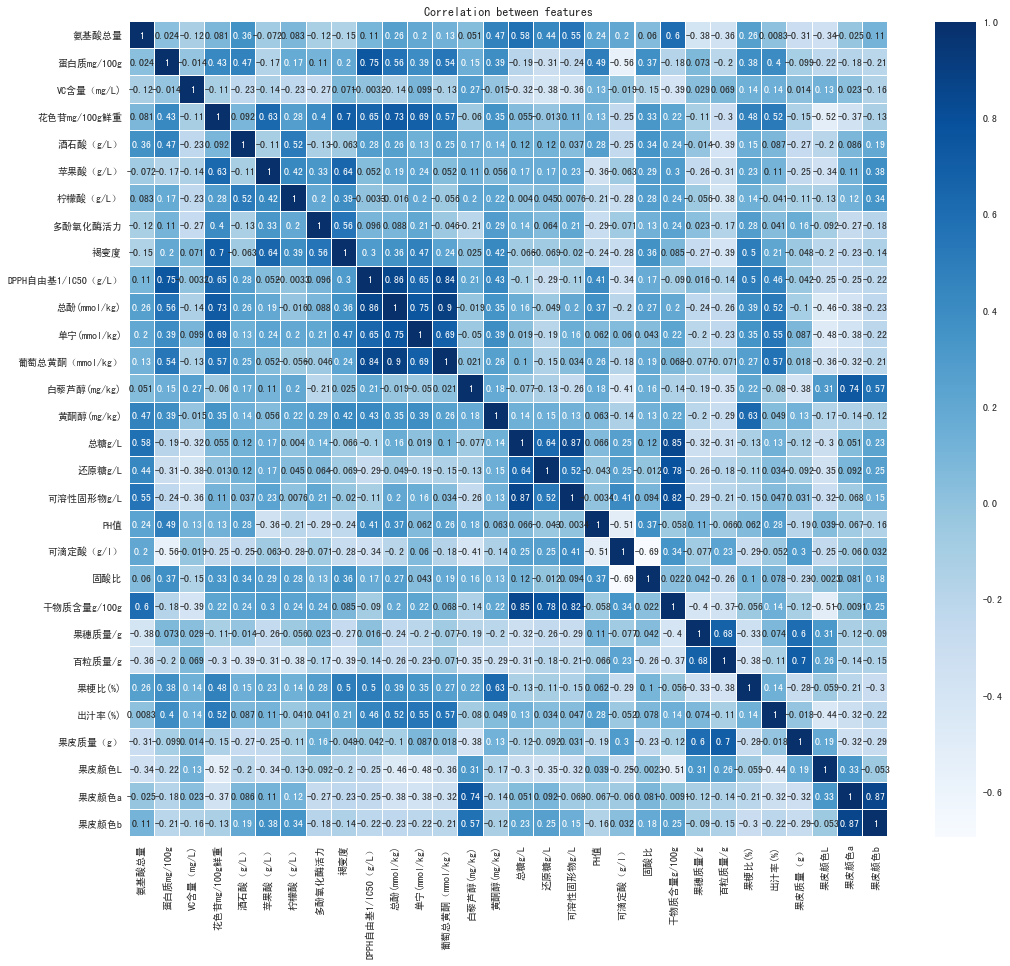

In [23]:
f, ax= plt.subplots(figsize = (17, 15))

corr = df_n.corr(method="pearson")
# print(corr)
sns.heatmap(corr,cmap="Blues", linewidths = 0.05, annot=True,ax = ax)

# 设置Axes的标题
ax.set_title('Correlation between features')
plt.show()

接下来画几个相关性很强的变量组合：

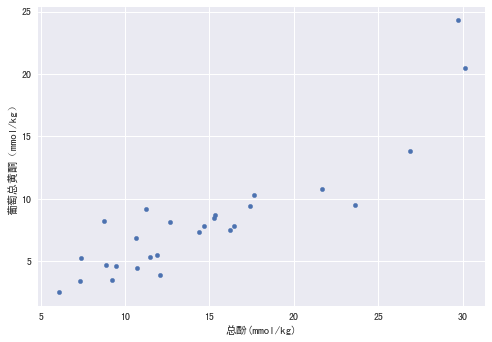

In [24]:
#bivariate analysis saleprice/grlivarea
data_b = pd.concat([df_n['总酚(mmol/kg)'], df_n['葡萄总黄酮（mmol/kg）']], axis=1)
data_b.plot.scatter(x='总酚(mmol/kg)', y='葡萄总黄酮（mmol/kg）')

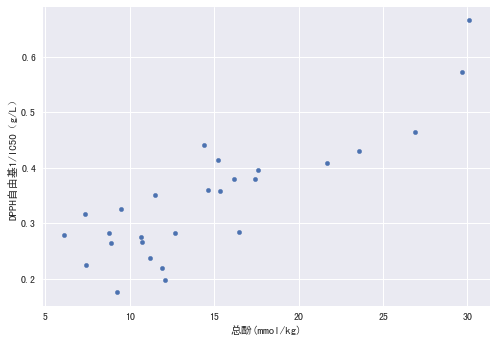

In [25]:
#bivariate analysis saleprice/grlivarea
data_b = pd.concat([df_n['总酚(mmol/kg)'], df_n['DPPH自由基1/IC50（g/L）']], axis=1)
data_b.plot.scatter(x='总酚(mmol/kg)', y='DPPH自由基1/IC50（g/L）')

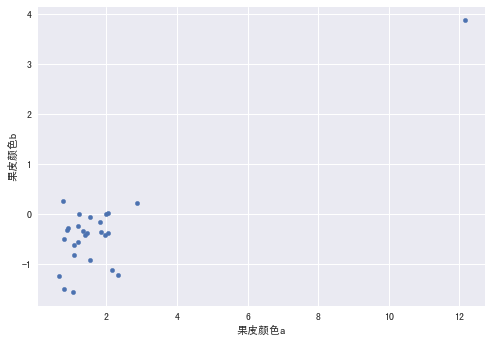

In [26]:
#bivariate analysis saleprice/grlivarea
data_b = pd.concat([df_n['果皮颜色a'], df_n['果皮颜色b']], axis=1)
data_b.plot.scatter(x='果皮颜色a', y='果皮颜色b')

有很多相关性很强的组，考虑用PCA抽取因子：

In [27]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

data_n = df_n.values
norm = zscore(data_n, ddof=1) # 数据标准化
model = PCA().fit(norm) # 构造并拟合模型
print('特征值是：\n', model.explained_variance_)
print('各主成分贡献率：\n', model.explained_variance_ratio_)
model.explained_variance_ratio_[0:9].sum()

特征值是：
 [6.96620087e+00 4.94002219e+00 3.73710154e+00 2.84002576e+00
 1.99883234e+00 1.74235539e+00 1.41845182e+00 1.27006195e+00
 9.60932205e-01 7.38411581e-01 6.90736240e-01 5.13815086e-01
 4.93512226e-01 3.71999239e-01 2.95749984e-01 2.53891607e-01
 2.18478989e-01 2.00362850e-01 1.12446744e-01 7.00740983e-02
 6.17743951e-02 4.30187388e-02 3.24040807e-02 1.57578026e-02
 1.01228433e-02 3.45942933e-03 4.28898189e-32]
各主成分贡献率：
 [2.32206696e-01 1.64667406e-01 1.24570051e-01 9.46675252e-02
 6.66277448e-02 5.80785129e-02 4.72817273e-02 4.23353982e-02
 3.20310735e-02 2.46137194e-02 2.30245413e-02 1.71271695e-02
 1.64504075e-02 1.23999746e-02 9.85833279e-03 8.46305356e-03
 7.28263298e-03 6.67876167e-03 3.74822481e-03 2.33580328e-03
 2.05914650e-03 1.43395796e-03 1.08013602e-03 5.25260086e-04
 3.37428111e-04 1.15314311e-04 1.42966063e-33]


0.8624661354620993

可以只取前九个特征，方差累计贡献率已经达到了0.86以上

In [28]:
xs1 = model.components_
# print('各主成分系数：\n',xs1) # 就是协方差矩阵特征向量矩阵

In [ ]:
check = xs1.sum(axis = 1, keepdims=True) # 计算各个主成分系数和
xs2 = xs1*np.sign(check) # 和为负数的话就乘以-1
print('调整后的主成分系数：\n',xs2)

然后计算出10个主成分的值，作为特征的表示。

In [30]:
new_data = (norm @ xs2[0:9].T)

In [31]:
new_df = pd.DataFrame(data = new_data,columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9'])
new_df['得分'] = zscore(df2['整体评价'].values.tolist(),ddof=1)
new_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,得分
0,4.733598,0.866867,0.054103,-3.204794,0.455470,2.464943,-2.153155,0.611814,0.635234,-1.134139
1,4.442659,-0.941780,0.257600,1.068619,0.871190,0.008849,-1.903951,0.430359,0.010616,1.053129
2,4.382661,3.196514,-0.467217,3.034982,-1.350709,-2.511832,0.958862,1.372108,1.074830,0.428195
3,-2.343166,0.541620,0.074145,-0.361484,-1.012347,-0.164099,-0.421986,-0.636436,-1.106399,0.115729
4,-0.288748,-1.392253,-1.274045,0.689304,2.377487,0.233194,0.886849,-0.317240,0.033546,0.428195
5,-1.065182,2.721598,-2.549760,0.544496,-0.758741,0.655948,-0.177813,0.614394,-0.161885,-0.509205
6,-1.485471,2.823877,-0.736870,-1.207641,-1.439450,-0.042479,-1.264190,-0.761993,0.163135,-1.134139
7,3.005114,-0.056998,-0.184012,-5.338768,0.296623,-1.585895,2.198714,0.751245,-0.320553,-1.134139
8,5.675488,-2.724996,0.597019,2.238620,-0.157730,1.408445,0.458352,-1.689346,-0.699944,1.990530
9,-2.235164,-4.297987,0.875261,-0.112120,-3.901505,0.874254,-0.124233,0.907008,2.980566,-1.134139


可视化一下：

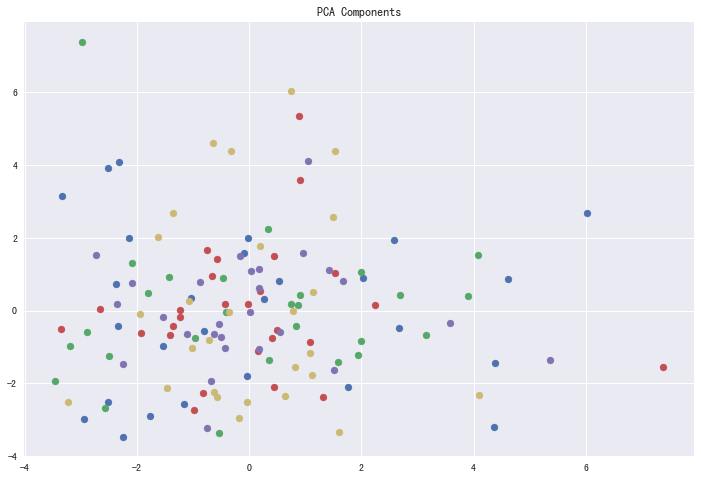

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(new_df.values)
plt.figure(figsize=(12,8))
plt.title('PCA Components')
plt.scatter(pca_result[:,0], pca_result[:,1])
plt.scatter(pca_result[:,1], pca_result[:,2])
plt.scatter(pca_result[:,2], pca_result[:,3])
plt.scatter(pca_result[:,3], pca_result[:,4])
plt.scatter(pca_result[:,4], pca_result[:,0])

考虑用聚类来分级，其实还是想要靠品酒员打分的值来去作为聚类的依据。

In [79]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42).fit(new_df.values)
labels = model.labels_
labels

array([4, 1, 1, 0, 3, 0, 0, 4, 1, 3, 2, 0, 3, 4, 0, 3, 0, 0, 3, 3, 1, 0,
       1, 0, 3, 3, 3], dtype=int32)

In [80]:
indexs = np.arange(0,27)
cate1 = indexs[labels == 0] + 1
cate2 = indexs[labels == 1] + 1
cate3 = indexs[labels == 2] + 1
cate4 = indexs[labels == 3] + 1
cate5 = indexs[labels == 4] + 1

# 每个级别对应的元素
print(cate1)
print(cate2)
print(cate3)
print(cate4)
print(cate5)

[ 4  6  7 12 15 17 18 22 24]
[ 2  3  9 21 23]
[11]
[ 5 10 13 16 19 20 25 26 27]
[ 1  8 14]


聚类轮廓系数：

In [94]:
from sklearn.metrics import silhouette_score
for i in range(2,6):
  model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(new_df.values)
  labels = model.labels_
  score = silhouette_score(new_df.values, labels)
  print(i,score)

2 0.22240550784582305
3 0.13307818535486457
4 0.12841886466783478
5 0.16560337268343747


虽然很低:)，但是参考对比了一下和打分的数值，结果还算河里。可以选五类先去聚类，那个独立的值合并一下，得到四类。

也可以尝试用评价模型，但是因为指标都比较模糊，不都是可以正向化的，所以可以用层次分析法评价

## 第三问

最基本的就是每个指标进行逐步回归，得到对应表达式。

In [35]:
df_p = pd.read_csv("data4.csv", encoding = 'gbk')
df_p

,花色苷(mg/L),单宁(mmol/L),总酚(mmol/L),酒总黄酮(mmol/L),白藜芦醇(mg/L),DPPH半抑制体积,色泽L,色泽a,色泽b
0,973.878315,11.029526,9.982555,8.019868,2.438200,0.358484,2.48,16.10,3.88
1,517.581289,11.078212,9.559821,13.300076,3.648419,0.460297,14.26,45.77,24.06
2,398.770012,13.259340,8.549384,7.367547,5.245588,0.396022,16.39,48.04,27.56
3,183.519455,6.477396,5.982047,4.306259,2.933739,0.176862,42.30,59.53,26.75
4,280.190458,5.849348,6.033600,3.643665,4.996943,0.206793,34.46,60.16,24.05
5,117.025527,7.353742,5.858320,4.444941,4.431105,0.211325,56.95,54.43,23.57
6,90.824783,4.013891,3.858066,2.765342,1.820459,0.111968,59.00,48.82,32.07
7,918.687856,12.027587,10.137214,7.747639,1.015809,0.346397,8.60,38.86,14.68
8,387.764932,12.933144,11.312621,9.904923,3.859905,0.385724,14.17,46.09,24.19
9,138.713779,5.566970,4.342664,3.145435,3.245901,0.136200,57.09,58.06,8.00


花色苷(mg/L)	单宁(mmol/L)	总酚(mmol/L)	酒总黄酮(mmol/L)	白藜芦醇(mg/L)	DPPH半抑制体积	色泽L	色泽a	色泽b

In [36]:
df_n.columns

Index(['氨基酸总量', '蛋白质mg/100g', 'VC含量（mg/L)', '花色苷mg/100g鲜重', '酒石酸（g/L）',
       '苹果酸（g/L）', '柠檬酸（g/L）', '多酚氧化酶活力', '褐变度', 'DPPH自由基1/IC50（g/L）',
       '总酚(mmol/kg)', '单宁(mmol/kg)', '葡萄总黄酮（mmol/kg）', '白藜芦醇(mg/kg)',
       '黄酮醇(mg/kg)', '总糖g/L', '还原糖g/L', '可溶性固形物g/L', 'PH值', '可滴定酸（g/l）', '固酸比',
       '干物质含量g/100g', '果穗质量/g', '百粒质量/g', '果梗比(%)', '出汁率(%)', '果皮质量（g）',
       '果皮颜色L', '果皮颜色a', '果皮颜色b'],
      dtype='object')

In [37]:
select_column = ['花色苷mg/100g鲜重','单宁(mmol/kg)','总酚(mmol/kg)','葡萄总黄酮（mmol/kg）','白藜芦醇(mg/kg)','DPPH自由基1/IC50（g/L）','果皮颜色L', '果皮颜色a', '果皮颜色b']

In [38]:
df_n_rename = df_n[select_column]
df_n_rename.columns = ['N花色苷','N单宁','N总酚','N葡萄总黄酮','N白藜芦醇','NDPPH自由基','N果皮颜色L', 'N果皮颜色a', 'N果皮颜色b']

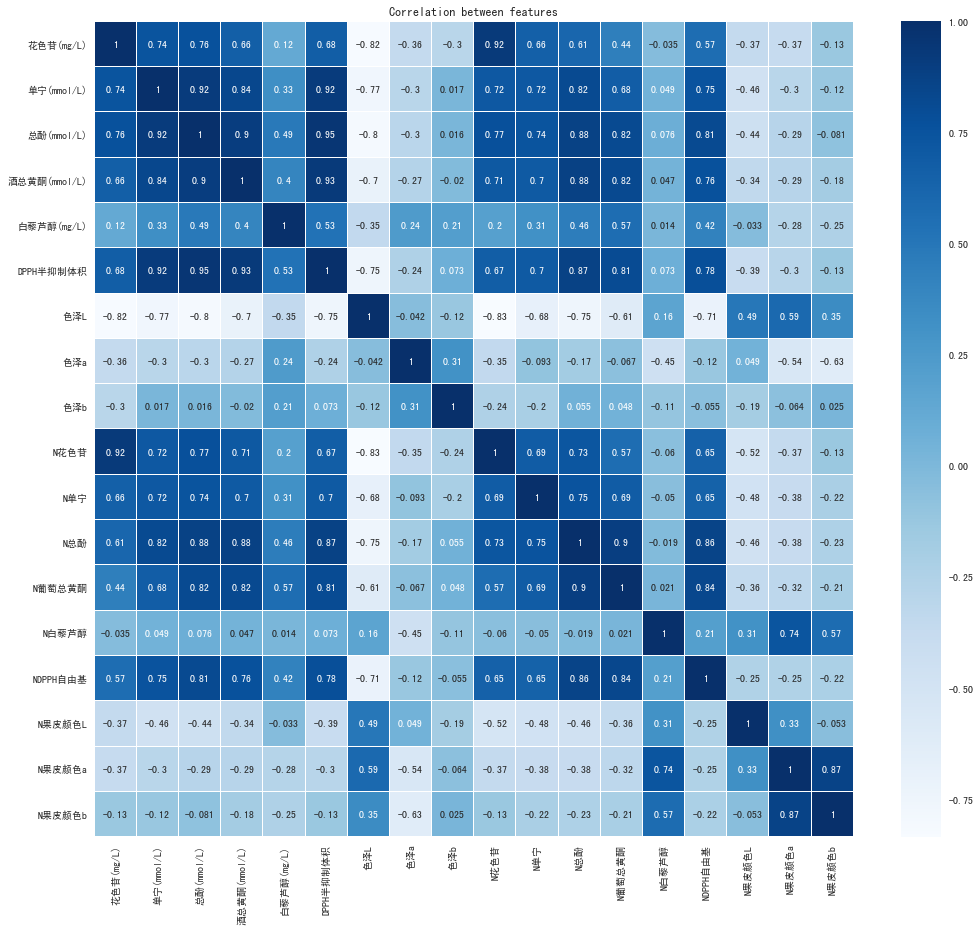

In [39]:
df_con = pd.concat([df_p,df_n_rename],axis = 1)
f, ax= plt.subplots(figsize = (17, 15))

corr = df_con.corr(method="pearson")
# print(corr)
sns.heatmap(corr,cmap="Blues", linewidths = 0.05, annot=True,ax = ax)

# 设置Axes的标题
ax.set_title('Correlation between features')
plt.show()

可以看到出了颜色以外的几个指标，酿酒葡萄和葡萄酒中相关性很强，考虑可以多元逐步回归来找关系。也可以考虑用主成分做回归，首先尝试初始数据做回归：

https://blog.csdn.net/ABC12138138/article/details/115431132

In [99]:
df_n_rename['y'] = df_p['单宁(mmol/L)'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
import itertools as it
import random

# Load data 读取数据
df = df_n_rename.astype(float)
target = 'y'
variate = set(df.columns)  # 获取列名
variate.remove(target)  # 去除因变量

# 定义多个数组，用来分别用来添加变量，删除变量
x = []
variate_add = []
variate_del = variate.copy()
# print(variate_del)
y = random.sample(variate, 3)  # 随机生成一个选模型，3为变量的个数
print(y)
# 将随机生成的三个变量分别输入到 添加变量和删除变量的数组
for i in y:
    variate_add.append(i)
    x.append(i)
    variate_del.remove(i)

global aic  # 设置全局变量 这里选择AIC值作为指标
formula = "{}~{}".format("y", "+".join(variate_add))  # 将自变量名连接起来
aic = smf.ols(formula=formula, data=df).fit().aic  # 获取随机函数的AIC值，与后面的进行对比
print("随机化选模型为：{}~{}，对应的AIC值为：{}".format("y", "+".join(variate_add), aic))
print("\n")


# 添加变量
def forwark():
    score_add = []
    global best_add_score
    global best_add_c
    print("添加变量")
    for c in variate_del:
        formula = "{}~{}".format("y", "+".join(variate_add + [c]))
        score = smf.ols(formula=formula, data=df).fit().aic
        score_add.append((score, c))  # 将添加的变量，以及新的AIC值一起存储在数组中

        print('自变量为{}，对应的AIC值为：{}'.format("+".join(variate_add + [c]), score))

    score_add.sort(reverse=True)  # 对数组内的数据进行排序，选择出AIC值最小的
    best_add_score, best_add_c = score_add.pop()

    print("最小AIC值为：{}".format(best_add_score))
    print("\n")


# 删除变量
def back():
    score_del = []
    global best_del_score
    global best_del_c
    print("剔除变量")
    for i in x:
        select = x.copy()  # copy一个集合，避免重复修改到原集合
        select.remove(i)
        formula = "{}~{}".format("y", "+".join(select))
        score = smf.ols(formula=formula, data=df).fit().aic
        print('自变量为{}，对应的AIC值为：{}'.format("+".join(select), score))
        score_del.append((score, i))

    score_del.sort(reverse=True)  # 排序，方便将最小值输出
    best_del_score, best_del_c = score_del.pop()  # 将最小的AIC值以及对应剔除的变量分别赋值
    print("最小AIC值为：{}".format(best_del_score))
    print("\n")


print("剩余变量为：{}".format(variate_del))
forwark()
back()

while variate:
    if aic < best_add_score < best_del_score or aic < best_del_score < best_add_score:
        print("当前回归方程为最优回归方程，为{}~{}，AIC值为：{}".format("y", "+".join(variate_add), aic))
        break
    elif best_add_score < best_del_score < aic or best_add_score < aic < best_del_score:
        print("目前最小的aic值为{}".format(best_add_score))
        print('选择自变量：{}'.format("+".join(variate_add + [best_add_c])))
        print('\n')
        variate_del.remove(best_add_c)
        variate_add.append(best_add_c)
        print("剩余变量为：{}".format(variate_del))
        aic = best_add_score
        forwark()
    else:
        print('当前最小AIC值为：{}'.format(best_del_score))
        print('需要剔除的变量为：{}'.format(best_del_c))
        aic = best_del_score  # 将AIC值较小的选模型AIC值赋给aic再接着下一轮的对比
        x.remove(best_del_c)  # 在原集合上剔除选模型所对应剔除的变量
        back()

['N总酚', 'N白藜芦醇', 'N花色苷']
随机化选模型为：y~N总酚+N白藜芦醇+N花色苷，对应的AIC值为：108.04081238155652


剩余变量为：{'N果皮颜色a', 'NDPPH自由基', 'N果皮颜色b', 'N单宁', 'N葡萄总黄酮', 'N果皮颜色L'}
添加变量
自变量为N总酚+N白藜芦醇+N花色苷+N果皮颜色a，对应的AIC值为：109.93119152903695
自变量为N总酚+N白藜芦醇+N花色苷+NDPPH自由基，对应的AIC值为：109.7249412326417
自变量为N总酚+N白藜芦醇+N花色苷+N果皮颜色b，对应的AIC值为：110.00891924701976
自变量为N总酚+N白藜芦醇+N花色苷+N单宁，对应的AIC值为：108.98517898171275
自变量为N总酚+N白藜芦醇+N花色苷+N葡萄总黄酮，对应的AIC值为：109.65449429319938
自变量为N总酚+N白藜芦醇+N花色苷+N果皮颜色L，对应的AIC值为：109.54051356048936
最小AIC值为：108.98517898171275


剔除变量
自变量为N白藜芦醇+N花色苷，对应的AIC值为：119.00504138888046
自变量为N总酚+N花色苷，对应的AIC值为：106.585097111692
自变量为N总酚+N白藜芦醇，对应的AIC值为：109.07548198609491
最小AIC值为：106.585097111692


当前最小AIC值为：106.585097111692
需要剔除的变量为：N白藜芦醇
剔除变量
自变量为N花色苷，对应的AIC值为：117.48746802349118
自变量为N总酚，对应的AIC值为：107.4198656151251
最小AIC值为：107.4198656151251


当前回归方程为最优回归方程，为y~N总酚+N白藜芦醇+N花色苷，AIC值为：106.585097111692


In [111]:
import numpy as np
import statsmodels.formula.api as smf
import pylab as plt
 
x1 = df_n_rename['N葡萄总黄酮'] 
x2 = df_n_rename['N白藜芦醇']  
x3 = df_n_rename['N花色苷']   
x4 = df_n_rename['N总酚']  
# x5 = df_n_rename['NDPPH自由基']  

y = df_n_rename['y'] 
# d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}
d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4}
ste = ''
for i in range(4):
  for j in range(4):
    ste = ste + '+x'+str(i) + '*x' + str(j) 

re1 = smf.ols('y~x1+x2+x3+x4', d).fit()
print('完全二次的残差方差：', re1.mse_resid)
# print('预测值：', re2.predict({'x1': 170, 'x2': 160}))
print(re1.summary())

完全二次的残差方差： 2.880098636312762
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     13.54
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.03e-05
Time:                        08:55:54   Log-Likelihood:                -49.827
No. Observations:                  27   AIC:                             109.7
Df Residuals:                      22   BIC:                             116.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9621  

In [112]:
new_df['y'] = df_p['单宁(mmol/L)'].values
new_df_re = new_df.drop(['得分'],axis =1)
new_df = new_df.drop(['y'],axis =1)

In [114]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
import itertools as it
import random

# Load data 读取数据
df = new_df_re.astype(float)
target = 'y'
variate = set(df.columns)  # 获取列名
variate.remove(target)  # 去除因变量

# 定义多个数组，用来分别用来添加变量，删除变量
x = []
variate_add = []
variate_del = variate.copy()
# print(variate_del)
y = random.sample(variate, 3)  # 随机生成一个选模型，3为变量的个数
print(y)
# 将随机生成的三个变量分别输入到 添加变量和删除变量的数组
for i in y:
    variate_add.append(i)
    x.append(i)
    variate_del.remove(i)

global aic  # 设置全局变量 这里选择AIC值作为指标
formula = "{}~{}".format("y", "+".join(variate_add))  # 将自变量名连接起来
aic = smf.ols(formula=formula, data=df).fit().aic  # 获取随机函数的AIC值，与后面的进行对比
print("随机化选模型为：{}~{}，对应的AIC值为：{}".format("y", "+".join(variate_add), aic))
print("\n")


# 添加变量
def forwark():
    score_add = []
    global best_add_score
    global best_add_c
    print("添加变量")
    for c in variate_del:
        formula = "{}~{}".format("y", "+".join(variate_add + [c]))
        score = smf.ols(formula=formula, data=df).fit().aic
        score_add.append((score, c))  # 将添加的变量，以及新的AIC值一起存储在数组中

        print('自变量为{}，对应的AIC值为：{}'.format("+".join(variate_add + [c]), score))

    score_add.sort(reverse=True)  # 对数组内的数据进行排序，选择出AIC值最小的
    best_add_score, best_add_c = score_add.pop()

    print("最小AIC值为：{}".format(best_add_score))
    print("\n")


# 删除变量
def back():
    score_del = []
    global best_del_score
    global best_del_c
    print("剔除变量")
    for i in x:
        select = x.copy()  # copy一个集合，避免重复修改到原集合
        select.remove(i)
        formula = "{}~{}".format("y", "+".join(select))
        score = smf.ols(formula=formula, data=df).fit().aic
        print('自变量为{}，对应的AIC值为：{}'.format("+".join(select), score))
        score_del.append((score, i))

    score_del.sort(reverse=True)  # 排序，方便将最小值输出
    best_del_score, best_del_c = score_del.pop()  # 将最小的AIC值以及对应剔除的变量分别赋值
    print("最小AIC值为：{}".format(best_del_score))
    print("\n")


print("剩余变量为：{}".format(variate_del))
forwark()
back()

while variate:
    if aic < best_add_score < best_del_score or aic < best_del_score < best_add_score:
        print("当前回归方程为最优回归方程，为{}~{}，AIC值为：{}".format("y", "+".join(variate_add), aic))
        break
    elif best_add_score < best_del_score < aic or best_add_score < aic < best_del_score:
        print("目前最小的aic值为{}".format(best_add_score))
        print('选择自变量：{}'.format("+".join(variate_add + [best_add_c])))
        print('\n')
        variate_del.remove(best_add_c)
        variate_add.append(best_add_c)
        print("剩余变量为：{}".format(variate_del))
        aic = best_add_score
        forwark()
    else:
        print('当前最小AIC值为：{}'.format(best_del_score))
        print('需要剔除的变量为：{}'.format(best_del_c))
        aic = best_del_score  # 将AIC值较小的选模型AIC值赋给aic再接着下一轮的对比
        x.remove(best_del_c)  # 在原集合上剔除选模型所对应剔除的变量
        back()

['F2', 'F6', 'F7']
随机化选模型为：y~F2+F6+F7，对应的AIC值为：140.00145501571174


剩余变量为：{'F9', 'F1', 'F5', 'F3', 'F4', 'F8'}
添加变量
自变量为F2+F6+F7+F9，对应的AIC值为：141.92277312979581
自变量为F2+F6+F7+F1，对应的AIC值为：102.64556967364513
自变量为F2+F6+F7+F5，对应的AIC值为：141.8410354191503
自变量为F2+F6+F7+F3，对应的AIC值为：141.51082361172024
自变量为F2+F6+F7+F4，对应的AIC值为：141.60246223701387
自变量为F2+F6+F7+F8，对应的AIC值为：141.36961522922903
最小AIC值为：102.64556967364513


剔除变量
自变量为F6+F7，对应的AIC值为：138.11791753135518
自变量为F2+F7，对应的AIC值为：138.00476474537618
自变量为F2+F6，对应的AIC值为：139.06533141888997
最小AIC值为：138.00476474537618


目前最小的aic值为102.64556967364513
选择自变量：F2+F6+F7+F1


剩余变量为：{'F9', 'F5', 'F3', 'F4', 'F8'}
添加变量
自变量为F2+F6+F7+F1+F9，对应的AIC值为：104.30593704557505
自变量为F2+F6+F7+F1+F5，对应的AIC值为：103.9495975061607
自变量为F2+F6+F7+F1+F3，对应的AIC值为：102.47176982301434
自变量为F2+F6+F7+F1+F4，对应的AIC值为：102.88823095914623
自变量为F2+F6+F7+F1+F8，对应的AIC值为：101.82003834173311
最小AIC值为：101.82003834173311


目前最小的aic值为101.82003834173311
选择自变量：F2+F6+F7+F1+F8


剩余变量为：{'F9', 'F5', 'F3', 'F4'}
添加变量
自变

In [117]:
import numpy as np
import statsmodels.formula.api as smf
import pylab as plt
 
x1 = new_df_re['F2'] 
x2 = new_df_re['F6']  
x3 = new_df_re['F7']   
x4 = new_df_re['F1']  
x5 = new_df_re['F8']  
x6 = new_df_re['F3'] 

y = new_df_re['y'] 
d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5,'x6':x6}
# d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4}
ste = ''
for i in range(6):
  for j in range(6):
    ste = ste + '+x'+str(i) + '*x' + str(j) 

re1 = smf.ols('y~x1+x2+x3+x4+x5+x6', d).fit()
print('完全二次的残差方差：', re1.mse_resid)
# print('预测值：', re2.predict({'x1': 170, 'x2': 160}))
print(re1.summary())

完全二次的残差方差： 2.0119251343952613
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     14.84
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.98e-06
Time:                        09:19:44   Log-Likelihood:                -43.698
No. Observations:                  27   AIC:                             101.4
Df Residuals:                      20   BIC:                             110.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2661 

可以看到用主成分回归效果会好很多:)，解释的话按照系数就行。

In [ ]:
# 线性多元回归
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2,random_state = 99)
X = X_train
y = y_train.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y)
y_test = y_test.reshape(-1,1)
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

x_range = np.arange(0,len(predictions))
plt.plot(x_range, predictions.reshape(-1), color = 'blue')
plt.plot(x_range, y_test.reshape(-1), color = 'red')

plt.legend()
plt.show()

## 问题四

可以建立理化性质和质量打分的模型，从多元逐步回归开始，然后再看看其他模型。

论证能否用葡萄和葡萄酒的理化指标来评价葡萄酒的质量，这个可以试试用多个模型去拟合一下。

葡萄酒的芳香物质对酿葡萄酒气味、口感等方面有很大的影响，可以通过酿酒:葡萄或葡萄酒的芳香物质来评价葡萄酒的质量。在分析芳香物质对葡萄酒质量的影响时，我们将葡萄酒的评价指标分为外观分析、口感分析、香气分析和整体评价，芳香物质主要影响葡萄酒的香气和口感，根据附件的评价体系，香气分析和口感分析占比例为 74%，因此利用葡萄酒的芳香物质来评价葡萄酒质量是可行的。

In [65]:
df_xg = df_con.drop(['N果皮颜色L', 'N果皮颜色a', 'N果皮颜色b','色泽L','色泽a','色泽b'],axis =1 )

[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

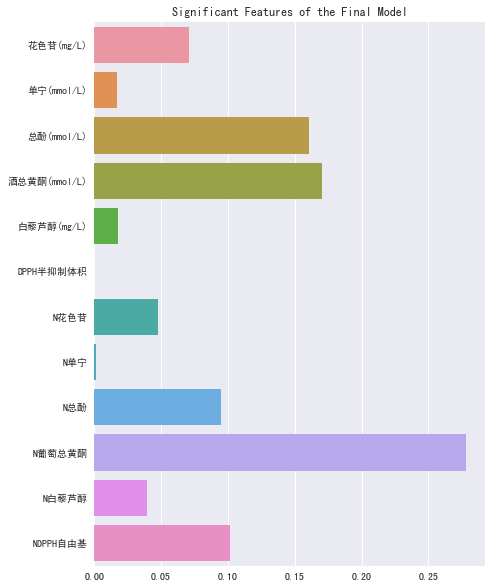

In [84]:
# 先用xgboost，虽然一共只有27组数据:)

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error,r2_score
x_values = df_xg.values
y_values = df2['整体评价'].values
feature_list = df_xg.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)
param_grid = {'n_estimators': [25,50,100,120],
              'max_depth': [1,2,4,6]}
xgb = XGBRegressor()
gsearch = GridSearchCV(xgb, param_grid=param_grid, cv=5)
gsearch.fit(X_train,y_train)

model = gsearch.best_estimator_
y_pred = model.predict(X_test)
print("R^2 on test data: ", r2_score(y_test,y_pred))
print("R^2 on train data: ", r2_score(y_train,model.predict(X_train)))
print(gsearch.best_params_)

# 绘制模型特征重要性图
plt.figure(figsize=(7, 10))
sns.barplot(x=model.feature_importances_, y = feature_list)
plt.title('Significant Features of the Final Model')
plt.show()


这结果也还算能接受，训练集上倒是挺高的，虽然数据量很少:)